In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import sys
from IPython.display import display

In [2]:
local_path = 'c:\\Users\\jorda\\Desktop\\Projects\\Experimental-Design'
if local_path not in sys.path:
    sys.path.append(local_path)

In [3]:
from experimental_design.analysis import Anova

,Source of Variation,Degrees of Freedom,Sum of Squares,Mean Square,Ratio,p-Value
0,Battery Type,3,427915.25,142638.416667,60.243238,0.0
1,Error,12,28412.50,2367.708333,,0.0
2,Total,15,456327.75,,,


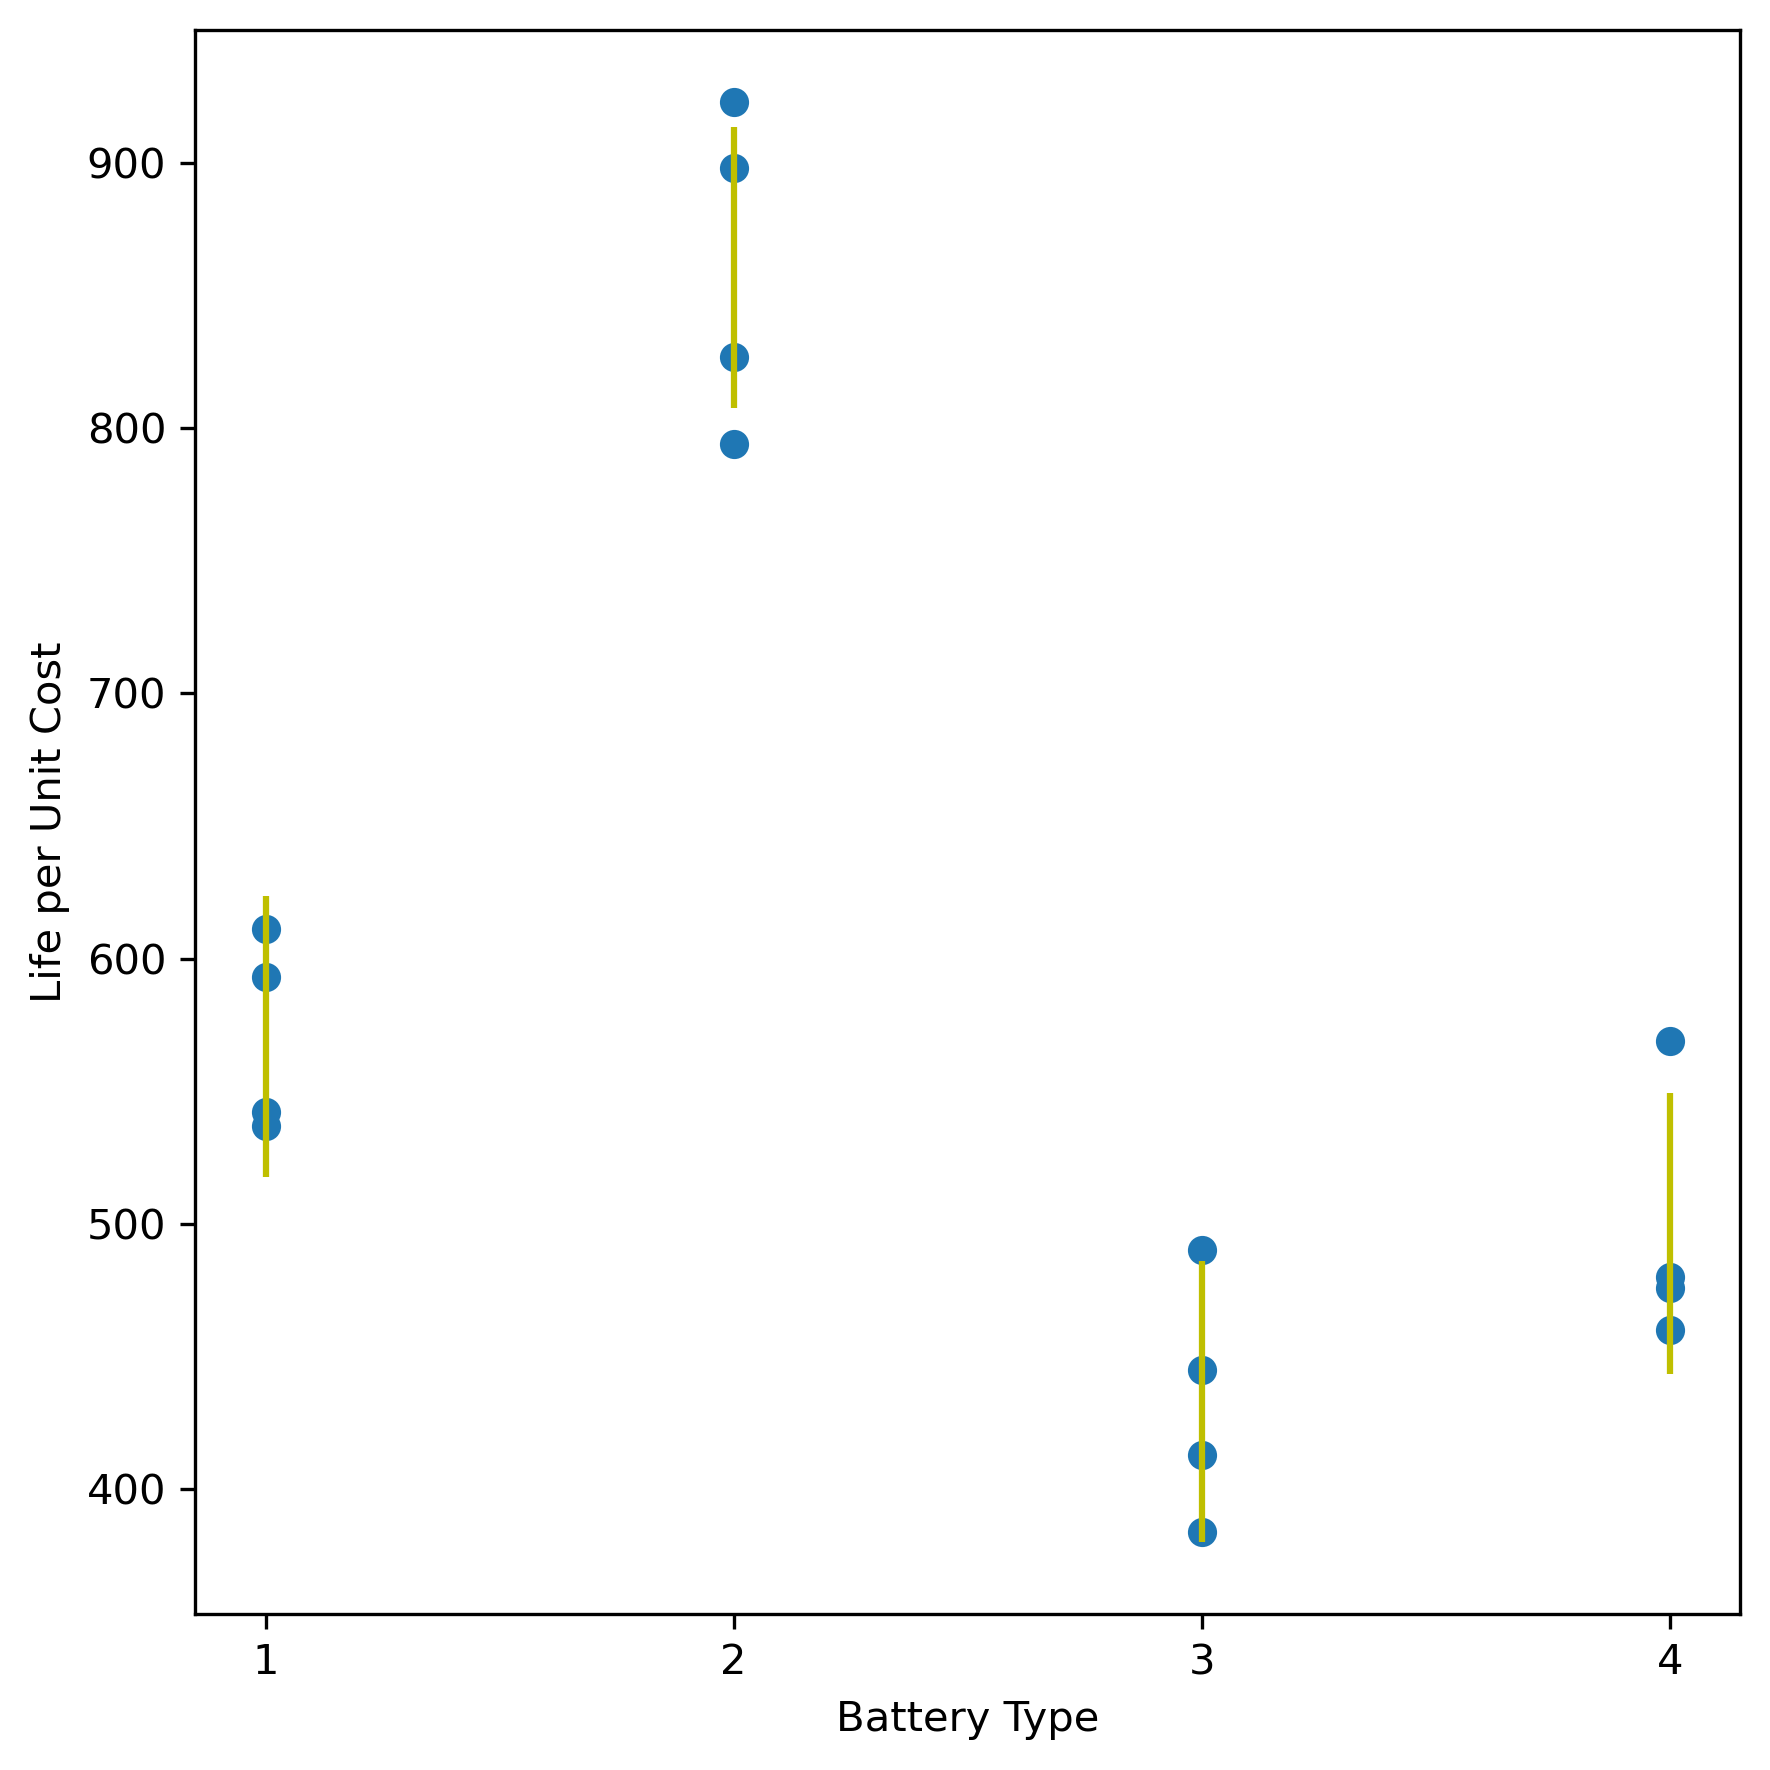

In [4]:
df = pd.DataFrame({
    "Battery Type" : [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
    "Junk" : np.random.choice([1,2], size=16),
    "Life per Unit Cost" : [611, 537, 542, 593, 923, 794, 827, 898,
                            445, 490, 384, 413, 476, 569, 480, 460]})

a = Anova(df, "Battery Type", "Life per Unit Cost")
display(a.anova_table)
a.scatter()

In [6]:
import functools


def decorator(func):
        @functools.wraps(func)
        def wrapper_decorator(*args, **kwargs):
            value = func(*args, **kwargs)
            return value
        return wrapper_decorator

In [16]:
import functools
import time

def timer(func):
    """Print the runtime of the decorated function"""
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        print(f"Finished {func.__name__!r} in {run_time:.4f} secs")
        return value
    return wrapper_timer

@timer
def waste_some_time(num_times):
    for _ in range(num_times):
        sum([i**2 for i in range(10000)])

waste_some_time(100)

Finished 'waste_some_time' in 0.6930 secs


In [19]:
def debug(func):
    @functools.wraps(func)
    def wrapper_debug(*args, **kwargs):
        args_repr = [repr(a) for a in args]
        kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]
        signature = ", ".join(args_repr + kwargs_repr)
        print(f"Calling {func.__name__}({signature})")
        value = func(*args, **kwargs)
        print(f"{func.__name__} returned {value!r}")
        return value
    return wrapper_debug

@debug
def make_greeting(name, age=None):
    if age is None:
        return f"Howdy {name}!"
    else:
        return f"Whoa {name}! {age} already, you are growing up!"

make_greeting("Jacob", 12)

Calling make_greeting('Jacob', 12)
make_greeting returned 'Whoa Jacob! 12 already, you are growing up!'


'Whoa Jacob! 12 already, you are growing up!'

In [21]:
def label(func):
    @functools.wraps(func)
    def wrapper_label(*args, **kwargs):
        print(f"{func.__name__} is being called")
        value = func(*args, **kwargs)
        return value
    return wrapper_label

@label
def print_hello(n):
    for _ in range(n):
        print("Hello")


print_hello(10)


print_hello is being called
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


In [22]:
class TimeWaster:

    @debug 
    def __init__(self, max_num):
        self.max_num = max_num

    @timer
    def waste_time(self, num_times):
        for _ in range(num_times):
            sum([i**2 for i in range(self.max_num)])

tw = TimeWaster(1000)

tw.waste_time(999)

Calling __init__(<__main__.TimeWaster object at 0x000001D82C5C4220>, 1000)
__init__ returned None
Finished 'waste_time' in 0.1745 secs


In [24]:
def repeat(num_times):
    def decorator_repeat(func):
        @functools.wraps(func)
        def wrapper_repeat(*args, **kwargs):
            for _ in range(num_times):
                value = func(*args, **kwargs)
            return value
        return wrapper_repeat
    return decorator_repeat

@repeat(10)
@debug
def greet(name):
    print(f"Hello {name}")


greet("alice")

Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None
Calling greet('alice')
Hello alice
greet returned None


In [33]:
class Averager:

    def __init__(self):
        self.series = []

    def __call__(self, number):
        self.series.append(number)
        print(sum(self.series) / len(self.series))

avg = Averager()

avg(10)
avg(20)
avg(30)


def make_averager():
    series = []

    def averager(new_value):
        series.append(new_value)
        total = sum(series)
        total - sum(series)
        return total / len(series)

    return averager

avg = make_averager()

print(avg(10))
print(avg(20))
print(avg(30))
avg.__closure__[0].cell_contents

10.0
15.0
20.0
10.0
15.0
20.0


[10, 20, 30]

In [40]:
def f1(x):
    return x**2

def f2(func):
    def inner(*args, **kwargs):
        value = func(*args, **kwargs) + 3
        return value
    return inner

@f2
def f1(x):
    return x**2

f1.__name__

'inner'

In [47]:
import time
import math

def clock(func):
    def clocked(*args):
        t0 = time.perf_counter()
        result = func(*args)
        elapsed = time.perf_counter() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
        print('[%0.8fs]%s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result
    return clocked

@clock
def calc(x):
    return sum([((x**i) / math.factorial(i)) for i in range(100)])

calc(1)


@clock
def factorial(n):
    return 1 if n < 2 else n*factorial(n-1)

factorial(10)


[0.00010880s]calc(1) -> 2.7182818284590455
[0.00000040s]factorial(1) -> 1
[0.00001210s]factorial(2) -> 2
[0.00001800s]factorial(3) -> 6
[0.00002290s]factorial(4) -> 24
[0.00002860s]factorial(5) -> 120
[0.00003370s]factorial(6) -> 720
[0.00003870s]factorial(7) -> 5040
[0.00004340s]factorial(8) -> 40320
[0.00004800s]factorial(9) -> 362880
[0.00005370s]factorial(10) -> 3628800


3628800

In [48]:

@clock
def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)


if __name__ == "__main__":
    fibonacci(6)

[0.00000030s]fibonacci(1) -> 1
[0.00000040s]fibonacci(0) -> 0
[0.00011690s]fibonacci(2) -> 1
[0.00000020s]fibonacci(1) -> 1
[0.00012500s]fibonacci(3) -> 2
[0.00000020s]fibonacci(1) -> 1
[0.00000020s]fibonacci(0) -> 0
[0.00000770s]fibonacci(2) -> 1
[0.00014010s]fibonacci(4) -> 3
[0.00000010s]fibonacci(1) -> 1
[0.00000020s]fibonacci(0) -> 0
[0.00000770s]fibonacci(2) -> 1
[0.00000020s]fibonacci(1) -> 1
[0.00001510s]fibonacci(3) -> 2
[0.00016340s]fibonacci(5) -> 5
[0.00000020s]fibonacci(1) -> 1
[0.00000020s]fibonacci(0) -> 0
[0.00000770s]fibonacci(2) -> 1
[0.00000020s]fibonacci(1) -> 1
[0.00001480s]fibonacci(3) -> 2
[0.00000020s]fibonacci(1) -> 1
[0.00000020s]fibonacci(0) -> 0
[0.00000980s]fibonacci(2) -> 1
[0.00003280s]fibonacci(4) -> 3
[0.00020560s]fibonacci(6) -> 8


In [49]:
print("hello")

hello


In [52]:
registry = set()

def register(active=True):
    def decorate(func):
        print('running register(acitve=%s)->decorate(%s)' % (active, func))
        if active:
            registry.add(func)
        else:
            registry.discard(func)
        return func
    return decorate

@register(active=False)
def f1():
    print("running f1")

@register()
def f2():
    print('running f2')

def f3():
    print('running f3')

running register(acitve=False)->decorate(<function f1 at 0x000001D82D142E50>)
running register(acitve=True)->decorate(<function f2 at 0x000001D82CED9B80>)


AttributeError: 'numpy.ndarray' object has no attribute '__dict__'